# Objective
## Logistic Regression:
## In this checkpoint, we are going to work again on the Titanic data set, but this time we will use logistic regression to predict if a passenger will survive or not. 

In [53]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df=pd.read_csv("Downloads/titanic-passengers 1.csv", sep=";")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [55]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [57]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Find missing information and replace it with the appropriate values

In [58]:
df['Age'].mean()

29.69911764705882

In [59]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [60]:
print(df['Age'].isnull().sum()) #Checking

0


## Replacing missing categorical values

In [61]:
print(df["Cabin"].value_counts())
df["Cabin"].fillna('G6', inplace=True)
print(df.isnull().sum())

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
              ..
C91            1
D45            1
F G63          1
A34            1
E63            1
Name: Cabin, Length: 147, dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64


In [62]:
print(df["Embarked"].value_counts())
df["Embarked"].fillna('S', inplace=True)
df["Embarked"].isnull().sum()

S    644
C    168
Q     77
Name: Embarked, dtype: int64


0

## Correlation 

In [40]:
df.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Pclass,-0.035144,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,-0.549500,0.091566,0.159651,0.216225,1.000000


In [63]:
df1 = df.drop(["PassengerId","SibSp","Parch","Ticket",], axis=1)
df1

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked
0,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,13.0000,G6,S
1,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,7.6500,F G73,S
2,No,3,"Jensen, Mr. Hans Peder",male,20.000000,7.8542,G6,S
3,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,21.0750,G6,S
4,No,1,"Davidson, Mr. Thornton",male,31.000000,52.0000,B71,S
...,...,...,...,...,...,...,...,...
886,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,30.0708,G6,C
887,No,3,"Sirayanian, Mr. Orsen",male,22.000000,7.2292,G6,C
888,No,3,"Cacic, Miss. Marija",female,30.000000,8.6625,G6,S
889,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,7.8958,G6,S


## 1. Apply logistic regression. 

In [64]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [66]:
#preparing data for logistic regression
df1["Survived"]=df1["Survived"].map({"Yes": 1, "No": 0})   #convert admitted variable into numerical
df1.head()

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked
0,0,2,"Collander, Mr. Erik Gustaf",male,28.0,13.0000,G6,S
1,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,7.6500,F G73,S
2,0,3,"Jensen, Mr. Hans Peder",male,20.0,7.8542,G6,S
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,21.0750,G6,S
4,0,1,"Davidson, Mr. Thornton",male,31.0,52.0000,B71,S


In [68]:
#features extraction
x = df1[['Pclass', 'Age']]
y = df1['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.68


<AxesSubplot:xlabel='Age', ylabel='Survived'>

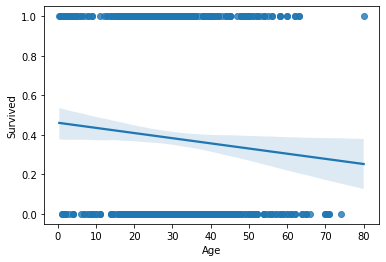

In [70]:
sns.regplot(x='Age',y='Survived',data=df1)

## 2. Use a confusion matrix to validate your model. 

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

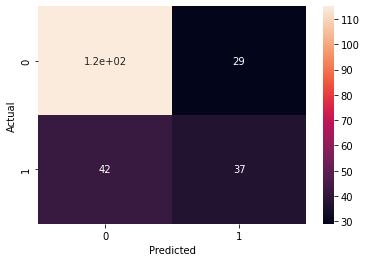

In [71]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76       144
           1       0.56      0.47      0.51        79

    accuracy                           0.68       223
   macro avg       0.65      0.63      0.64       223
weighted avg       0.67      0.68      0.67       223



## 3. Another validation matrix for classification is ROC / AUC, do your research on them explain them, and apply them in our case.